> ### Implementation of Ad-Sherlock for Click-Fraud Detection based on Deep-Learning Models

In [3]:
import random
import string
import os
import pickle
import dill
import torch
import warnings
import matplotlib.pyplot as plt

from faker import Faker
from torch import nn

In [4]:
warnings.filterwarnings("ignore")

plt.rcParams['figure.facecolor'] = 'gray'
plt.rcParams['axes.facecolor'] = 'gray'

print(f'count of gpu devices : `{torch.cuda.device_count()}`')
print(f'id of gpu device : `{torch.cuda.current_device()}`')
print(f'is cuda available : `{torch.cuda.is_available()}`')
print(f'is cuda enabled at backend : `{torch.backends.cudnn.enabled}`')
print(f'name of the instance gpu device : `{torch.cuda.get_device_name(torch.cuda.current_device())}`')
print(f'version of cuda : `{torch.backends.cudnn.version()}`')

count of gpu devices : `1`
id of gpu device : `0`
is cuda available : `True`
is cuda enabled at backend : `True`
name of the instance gpu device : `NVIDIA GeForce MX330`
version of cuda : `8700`


In [5]:
print("--------")
print("IPO")
io_pklio0uc = '../../../__/0/io_0__urls_cords.pkl'
def func_io_sudo_urls_cords(n=4*random.randrange(20,80)):
    random.seed(268862)
    Faker.seed(268862)
    fake = Faker()
    sudo_urls = [f'http://www.ads.{fake.domain_name()}' for _ in range(n//4)] + [f'https://www.ads.{fake.domain_name()}' for _ in range(n//4)] + [f'http://www.{fake.domain_name()}' for _ in range(n//4)] + [f'https://www.{fake.domain_name()}' for _ in range(n//4)]
    sudo_urls = [sudo_urls[P]+'/'+ ''.join(random.choice(random.choice(string.digits + string.ascii_letters)) for _ in range(random.randint(20, 80))) + '?' + '&'.join([f"param_{p}={''.join(random.choice(random.choice(string.digits + string.ascii_letters)) for _ in range(random.randint(20, 80)))}" for p in range(1, random.randint(2, 8) + 1)]) for P in range(len(sudo_urls))]
    random.shuffle(sudo_urls)
    sudo_isad = [1 if('ad' in i) else 0 for i in sudo_urls]
    sudo_cords = [(random.randrange(2,862268),random.randrange(2,862268)) for _ in range(n)]
    random.shuffle(sudo_cords)
    sudo_urls_cords = [(sudo_urls[p],(sudo_cords[p][0],sudo_cords[p][1]),sudo_isad[p]) for p in range(n)]
    random.shuffle(sudo_urls_cords)
    return sudo_urls_cords
if(not os.path.exists(io_pklio0uc)):
    io__sudo_urls_cords = func_io_sudo_urls_cords(888) # n : multiples of '4'
    pickle.dump(io__sudo_urls_cords, open(io_pklio0uc, 'wb'))
io__sudo_urls_cords = pickle.load(open(io_pklio0uc, 'rb'))
io__sudo_urls = [p[0] for p in io__sudo_urls_cords]
io__sudo_cord_x,io__sudo_cord_y = [p[1][0] for p in io__sudo_urls_cords],[p[1][1] for p in io__sudo_urls_cords]
io__sudo_isad = [p[2] for p in io__sudo_urls_cords]
for p in random.sample(io__sudo_urls_cords,4):
    print(p)
print("--------")

print("--------")
def func_oi__sudo_urls_cords(oi):
    sudo_url = oi[0]
    sudo_cord_x,sudo_cord_y = oi[1][0],oi[1][1]
    pass

--------
IPO
('http://www.kim.com/bfYmF01Fsnh0jQB8gILKRFohjWuJW597Z51Njt4gswX8gKrGnWAllXLyC5Wk3hbrmZPSlwci?param_1=HNe9kBUvKkz5CdrcLSK5bPnaIuu7TJ1Y21yQyuX6xm6jTsiOf8ffPv6KZ3YX0oj7TE1PAtP&param_2=MsbieDGfhXLH1245tzBUOCbeYuaYNFyB2bORVqZxvCPgdlk&param_3=BYo3HJeSfoxpiQEUapfO0vXm2OY62tzvJR6opgnpbtyWMFvAmjWX20SEWxDcOBMZlEe5Xsj7XgimQlz', (84091, 467104), 0)
('http://www.moon-best.com/rGA2PDWM6yzmo4jsvIQLhXm?param_1=1qhDiYfCc6810RTCF17ogWhF8uky&param_2=NtaxzMtwebAAnpQuuZ2SEHKaxqmNUhSPxOpJkbPbRBF&param_3=UmKH5AYHRV7xMHneajIaa3UUxixK4Y1M5o2Vz8jCpK7RX850uFFq7bS6CEDP&param_4=ewybWo5aqffWZpCIbyHMGqDyV60t0&param_5=ibBHv8CzQtJysCETfioc5rjcCR1Waj6vqPhgF2ufGjdmklPqvPHdjltz&param_6=W0BQ4N1c66IDdx1b9f2L2TNmvrewTwsD4nzBOoiDUH1jetFyuyndkjYbFuE&param_7=bD3tCFoGfLxN8NB68XvogRBZetnc92DFCinFZLyNbbEMSz1r4HtjI&param_8=Bom10vCHlrMjCKSKFd1ferklWpBIS3', (595263, 102288), 0)
('http://www.green-hale.com/0ppcruaNAlK4vaHH11VkDO6?param_1=L8gnXE9NRN5cqL0OVgm0&param_2=GoW7Fa98rYT5ctSjmnKVJA5sUp6IWpSmHsosa0o9yPyop4N9vzDrbf

In [6]:
io__sudo_urls = torch.tensor([[ord(p) for p in io] + [(-1)*len(io)]*(862 - len(io)) for io in io__sudo_urls]).to(torch.float).cuda(torch.cuda.current_device())

io__sudo_cord_x = torch.tensor(io__sudo_cord_x).cuda(torch.cuda.current_device())
io__sudo_cord_y = torch.tensor(io__sudo_cord_y).cuda(torch.cuda.current_device())
io__sudo_cords = torch.stack((io__sudo_cord_x,io__sudo_cord_y),dim=1).cuda(torch.cuda.current_device())

io__sudo_isad = torch.tensor(io__sudo_isad).cuda(torch.cuda.current_device())

In [7]:
class __01__(nn.Module):

    import torch

    def __init__(IO):

        super().__init__()

        IO._O_ = torch.zeros(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())
        IO._I_ = torch.ones(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())

        IO.l20 = nn.Linear(862,1)
        IO.l21 = nn.Linear(2,1)
        IO.l30 = nn.Bilinear(1,1,1)
        IO.l31 = nn.Bilinear(1,1,1)
        IO.l40 = nn.Identity()
        IO.l41 = nn.Identity()   
        IO.l5 = nn.Sigmoid()

        IO.h20 = torch.zeros(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())
        IO.h21 = torch.zeros(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())
        IO.h22 = torch.zeros(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())
        IO.h23 = torch.zeros(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())
        IO.h30 = torch.zeros(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())
        IO.h31 = torch.zeros(1).unsqueeze(0).to(torch.float).cuda(torch.cuda.current_device())

    def __8__(IO,ip=['',(0,0)],op=0.5):
        import torch
        IO.ip = ip
        IO.h00 = IO.ip
        IO.h10 = IO.l20(IO.h00[0].to(torch.float)).unsqueeze(0)
        IO.h11 = IO.l21(IO.h00[1].to(torch.float)).unsqueeze(0)
        IO.h20[op==0 or op==0.5] = IO.l30(IO.h20,IO.h10)
        IO.h21[op==0.5 or op==1] = IO.l30(IO.h21,IO.h10)
        IO.h22[op==0 or op==0.5] = IO.l31(IO.h22,IO.h11)
        IO.h23[op==0.5 or op==1] = IO.l31(IO.h23,IO.h11)
        IO.h30[op==0] = IO.l40(torch.max(IO.h20,IO._O_))
        IO.h30[op==0.5] = IO.l40(torch.max(IO.h20,IO.h21))
        IO.h30[op==1] = IO.l40(torch.max(IO.h21,IO._O_))
        IO.h31[op==0] = IO.l41(torch.max(IO.h22,IO._O_))
        IO.h31[op==0.5] = IO.l41(torch.max(IO.h22,IO.h23))
        IO.h31[op==1] = IO.l41(torch.max(IO.h23,IO._O_))
        IO.h40 = IO.l5(torch.mean(torch.stack((IO.h30,IO.h31)))).item()
        IO.op = int(IO.h40 > 0.5)
        
        return(IO.op)

In [8]:
_01_ = __01__().cuda(torch.cuda.current_device())
print(_01_)

__01__(
  (l20): Linear(in_features=862, out_features=1, bias=True)
  (l21): Linear(in_features=2, out_features=1, bias=True)
  (l30): Bilinear(in1_features=1, in2_features=1, out_features=1, bias=True)
  (l31): Bilinear(in1_features=1, in2_features=1, out_features=1, bias=True)
  (l40): Identity()
  (l41): Identity()
  (l5): Sigmoid()
)


In [9]:
dct__01_wb = {}

for i,j in _01_.named_parameters():
    dct__01_wb[i] = j.mean().item()
    print(i,j.mean().item())

l20.weight -0.0001720111904432997
l20.bias -0.016804320737719536
l21.weight 0.1394566297531128
l21.bias -0.3512789011001587
l30.weight 0.9536659717559814
l30.bias 0.31070518493652344
l31.weight 0.9351744651794434
l31.bias 0.422979474067688


In [10]:
lip0,lip1,lop0,lop1,lio0,lio1 = [],[],[],[],[],[]

for n in range(0,666):
    lip0.append(_01_.__8__(ip=[io__sudo_urls[n],io__sudo_cords[n]],op=io__sudo_isad[n].__int__()))
    lip1.append(io__sudo_isad[n].__int__())

for n in range(666,888):
    lop0.append(_01_.__8__(ip=[io__sudo_urls[n],io__sudo_cords[n]]))
    lop1.append(io__sudo_isad[n].__int__())

for n in range(0,888):
    lio0.append(_01_.__8__(ip=[io__sudo_urls[n],io__sudo_cords[n]]))
    lio1.append(io__sudo_isad[n].__int__())

In [11]:
print(f"training instances : (666) : \n\t:: no. of instances pridicted as 'click-fraud' : {sum(lip0)} \n\t:: no. of instances actually 'click-fraud' : {sum(lip1)} \n\t:: percent of pridiction of 'click-fraud' : {sum(lip0)/sum(lip1)*100}")
print(f"testing instances : (222) : \n\t:: no. of instances pridicted as 'click-fraud' : {sum(lop0)} \n\t:: no. of instances actually 'click-fraud' : {sum(lop1)} \n\t:: percent of pridiction of 'click-fraud' : {sum(lop0)/sum(lop1)*100}")
print(f"overall instances : (888) : \n\t:: no. of instances pridicted as 'click-fraud' : {sum(lio0)} \n\t:: no. of instances actually 'click-fraud' : {sum(lio1)} \n\t:: percent of pridiction of 'click-fraud' : {sum(lio0)/sum(lio1)*100}")
print(" - - - - - - - - "*6)
ipo0 = _01_.__8__(ip=[io__sudo_urls[random.choice(range(0,889))],io__sudo_cords[random.choice(range(0,889))]])
print(f"evaluating a random instance (0) `{random.choice(range(0,889))}` :",end="\n\t:: ")
print(f'predicted output :: {ipo0} || actual output :: {io__sudo_isad[random.choice(range(0,889))].__int__()}')
ipo1 = _01_.__8__(ip=[io__sudo_urls[random.choice(range(0,889))],io__sudo_cords[random.choice(range(0,889))]])
print(f"evaluating a random instance (1) `{random.choice(range(0,889))}` :",end="\n\t:: ")
print(f'predicted output :: {ipo1} || actual output :: {io__sudo_isad[random.choice(range(0,889))].__int__()}')

training instances : (666) : 
	:: no. of instances pridicted as 'click-fraud' : 524 
	:: no. of instances actually 'click-fraud' : 372 
	:: percent of pridiction of 'click-fraud' : 140.86021505376345
testing instances : (222) : 
	:: no. of instances pridicted as 'click-fraud' : 102 
	:: no. of instances actually 'click-fraud' : 115 
	:: percent of pridiction of 'click-fraud' : 88.69565217391305
overall instances : (888) : 
	:: no. of instances pridicted as 'click-fraud' : 407 
	:: no. of instances actually 'click-fraud' : 487 
	:: percent of pridiction of 'click-fraud' : 83.5728952772074
 - - - - - - - -  - - - - - - - -  - - - - - - - -  - - - - - - - -  - - - - - - - -  - - - - - - - - 
evaluating a random instance (0) `49` :
	:: predicted output :: 0 || actual output :: 0
evaluating a random instance (1) `420` :
	:: predicted output :: 1 || actual output :: 1


In [12]:
plt.plot(lio0, marker='|', linestyle='None', color='black')
plt.yticks([0, 1])
plt.xticks(range(0,889,222))

plt.plot(lio1, marker='|', linestyle='None', color='white')
plt.yticks([0, 1])
plt.xticks(range(0,889,222))


([<matplotlib.axis.XTick at 0x15aaaf25850>,
 [Text(0, 0, '0'),
  Text(222, 0, '222'),
  Text(444, 0, '444'),
  Text(666, 0, '666'),
  Text(888, 0, '888')])

In [13]:
dil__nn__01 = '../../../__/0/_01_.dil'

if(not os.path.exists(dil__nn__01)):
    dill.dump(_01_, open(dil__nn__01, 'wb'))

dil__nn__01 = '../../../__/0/_01_.dil'
_01_ = dill.load(open(dil__nn__01, 'rb'))
print(_01_)

__01__(
  (l20): Linear(in_features=862, out_features=1, bias=True)
  (l21): Linear(in_features=2, out_features=1, bias=True)
  (l30): Bilinear(in1_features=1, in2_features=1, out_features=1, bias=True)
  (l31): Bilinear(in1_features=1, in2_features=1, out_features=1, bias=True)
  (l40): Identity()
  (l41): Identity()
  (l5): Sigmoid()
)


In [14]:
import graphviz
from IPython.display import display

gv__nn__01 = graphviz.Digraph()

gv__nn__01.attr(label='schematic structure of weights and bias of the "__01__ Neural Network"' ,rankdir='LR')


gv__nn__01.node(name='l10',label='(...)',shape='box', style='rounded')
gv__nn__01.node(name='l20',label=str(f"(...) + ({dct__01_wb['l20.bias']:.6f})"),shape='box', style='rounded')
gv__nn__01.node(name='l21',label=str(f"(...) + ({dct__01_wb['l21.bias']:.6f})"),shape='box', style='rounded')
gv__nn__01.node(name='l30',label=str(f"(...) + ({dct__01_wb['l30.bias']:.6f})"),shape='box', style='rounded')
gv__nn__01.node(name='l31',label=str(f"(...) + ({dct__01_wb['l31.bias']:.6f})"),shape='box', style='rounded')
gv__nn__01.node(name='l40',label='(...)',shape='box', style='rounded')


gv__nn__01.edge('l10','l20',label=str(f"{dct__01_wb['l20.weight']:.6f}"))
gv__nn__01.edge('l10','l21',label=str(f"{dct__01_wb['l21.weight']:.6f}"))
gv__nn__01.edge('l20','l30',label=str(f"{dct__01_wb['l30.weight']:.6f}"))
gv__nn__01.edge('l21','l31',label=str(f"{dct__01_wb['l31.weight']:.6f}"))
gv__nn__01.edge('l30','l40',style='dashed')
gv__nn__01.edge('l31','l40',style='dashed')



display(gv__nn__01)

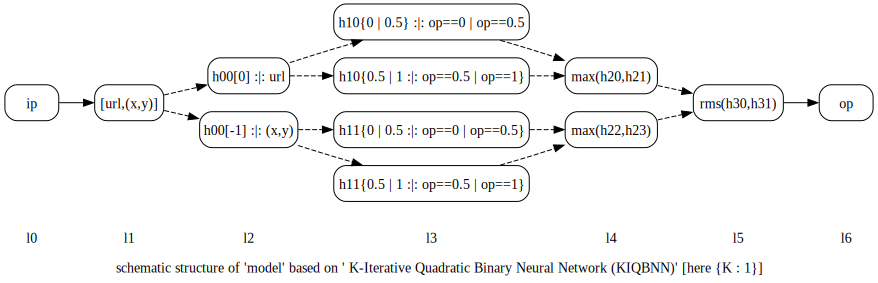

In [15]:
import graphviz
from IPython.display import display

gv__nn__01 = graphviz.Digraph()

gv__nn__01.attr(label='schematic structure of \'model\' based on \' K-Iterative Quadratic Binary Neural Network (KIQBNN)\' [here {K : 1}]' ,rankdir='LR')

gv__nn__01.node(name='0',label='l0',shape="plaintext")
gv__nn__01.node(name='1',label='l1',shape="plaintext")
gv__nn__01.node(name='2',label='l2',shape="plaintext")
gv__nn__01.node(name='3',label='l3',shape="plaintext")
gv__nn__01.node(name='4',label='l4',shape="plaintext")
gv__nn__01.node(name='5',label='l5',shape="plaintext")
gv__nn__01.node(name='6',label='l6',shape="plaintext")

gv__nn__01.edge('0','1',style='invis')
gv__nn__01.edge('1','2',style='invis')
gv__nn__01.edge('2','3',style='invis')
gv__nn__01.edge('3','4',style='invis')
gv__nn__01.edge('4','5',style='invis')
gv__nn__01.edge('5','6',style='invis')

gv__nn__01.node(name='ip',label='ip',shape='box', style='rounded')
gv__nn__01.node(name='h00',label='[url,(x,y)]',shape='box', style='rounded')
gv__nn__01.node(name='h10',label='h00[0] :|: url',shape='box', style='rounded')
gv__nn__01.node(name='h11',label='h00[-1] :|: (x,y)',shape='box', style='rounded')
gv__nn__01.node(name='h20',label='h10{0 | 0.5} :|: op==0 | op==0.5',shape='box', style='rounded')
gv__nn__01.node(name='h21',label='h10{0.5 | 1 :|: op==0.5 | op==1}',shape='box', style='rounded')
gv__nn__01.node(name='h22',label='h11{0 | 0.5 :|: op==0 | op==0.5}',shape='box', style='rounded')
gv__nn__01.node(name='h23',label='h11{0.5 | 1 :|: op==0.5 | op==1}',shape='box', style='rounded')
gv__nn__01.node(name='h30',label='max(h20,h21)',shape='box', style='rounded')
gv__nn__01.node(name='h31',label='max(h22,h23)',shape='box', style='rounded')
gv__nn__01.node(name='h40',label='rms(h30,h31)',shape='box', style='rounded')
gv__nn__01.node(name='op',label='op',shape='box', style='rounded')

gv__nn__01.edge('ip','h00')
gv__nn__01.edge('h00','h10',style='dashed')
gv__nn__01.edge('h00','h11',style='dashed')
gv__nn__01.edge('h10','h20',style='dashed')
gv__nn__01.edge('h10','h21',style='dashed')
gv__nn__01.edge('h11','h22',style='dashed')
gv__nn__01.edge('h11','h23',style='dashed')
gv__nn__01.edge('h20','h30',style='dashed')
gv__nn__01.edge('h21','h30',style='dashed')
gv__nn__01.edge('h22','h31',style='dashed')
gv__nn__01.edge('h23','h31',style='dashed')
gv__nn__01.edge('h30','h40',style='dashed')
gv__nn__01.edge('h31','h40',style='dashed')
gv__nn__01.edge('h40','op')

display(gv__nn__01)

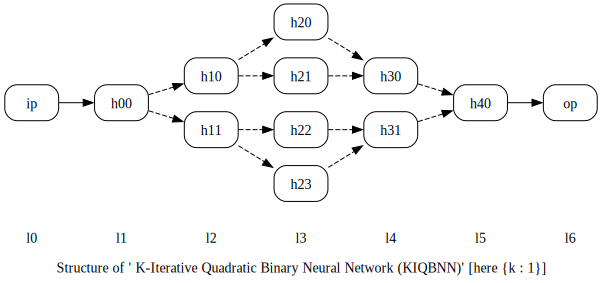

In [16]:
import graphviz
from IPython.display import display

gv__nn__01 = graphviz.Digraph()

gv__nn__01.attr(label='Structure of \' K-Iterative Quadratic Binary Neural Network (KIQBNN)\' [here {k : 1}]',rankdir='LR')

gv__nn__01.node(name='0',label='l0',shape="plaintext")
gv__nn__01.node(name='1',label='l1',shape="plaintext")
gv__nn__01.node(name='2',label='l2',shape="plaintext")
gv__nn__01.node(name='3',label='l3',shape="plaintext")
gv__nn__01.node(name='4',label='l4',shape="plaintext")
gv__nn__01.node(name='5',label='l5',shape="plaintext")
gv__nn__01.node(name='6',label='l6',shape="plaintext")

gv__nn__01.edge('0','1',style='invis')
gv__nn__01.edge('1','2',style='invis')
gv__nn__01.edge('2','3',style='invis')
gv__nn__01.edge('3','4',style='invis')
gv__nn__01.edge('4','5',style='invis')
gv__nn__01.edge('5','6',style='invis')

gv__nn__01.node(name='ip',label='ip',shape='box', style='rounded')
gv__nn__01.node(name='h00',label='h00',shape='box', style='rounded')
gv__nn__01.node(name='h10',label='h10',shape='box', style='rounded')
gv__nn__01.node(name='h11',label='h11',shape='box', style='rounded')
gv__nn__01.node(name='h20',label='h20',shape='box', style='rounded')
gv__nn__01.node(name='h21',label='h21',shape='box', style='rounded')
gv__nn__01.node(name='h22',label='h22',shape='box', style='rounded')
gv__nn__01.node(name='h23',label='h23',shape='box', style='rounded')
gv__nn__01.node(name='h30',label='h30',shape='box', style='rounded')
gv__nn__01.node(name='h31',label='h31',shape='box', style='rounded')
gv__nn__01.node(name='h40',label='h40',shape='box', style='rounded')
gv__nn__01.node(name='op',label='op',shape='box', style='rounded')

gv__nn__01.edge('ip','h00')
gv__nn__01.edge('h00','h10',style='dashed')
gv__nn__01.edge('h00','h11',style='dashed')
gv__nn__01.edge('h10','h20',style='dashed')
gv__nn__01.edge('h10','h21',style='dashed')
gv__nn__01.edge('h11','h22',style='dashed')
gv__nn__01.edge('h11','h23',style='dashed')
gv__nn__01.edge('h20','h30',style='dashed')
gv__nn__01.edge('h21','h30',style='dashed')
gv__nn__01.edge('h22','h31',style='dashed')
gv__nn__01.edge('h23','h31',style='dashed')
gv__nn__01.edge('h30','h40',style='dashed')
gv__nn__01.edge('h31','h40',style='dashed')
gv__nn__01.edge('h40','op')

display(gv__nn__01)